In [4]:
# Libraries 
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import talib as ta
from statistics import stdev

In [5]:
company = pd.read_csv("data/REL.csv", thousands=",")
company

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,27-Dec-2023,EQ,2582.00,2599.90,2573.10,2578.05,2583.35,2586.85,2586.56,2630.95,2220.3,4602078,1.190355e+10,191497
1,26-Dec-2023,EQ,2568.00,2591.95,2562.70,2565.05,2579.00,2578.05,2579.88,2630.95,2220.3,3732832,9.630263e+09,188513
2,22-Dec-2023,EQ,2559.60,2580.90,2547.65,2562.55,2561.00,2565.05,2559.79,2630.95,2220.3,8270892,2.117171e+10,274088
3,21-Dec-2023,EQ,2527.00,2573.50,2518.25,2527.15,2561.00,2562.55,2551.74,2630.95,2220.3,6882727,1.756295e+10,235158
4,20-Dec-2023,EQ,2571.05,2598.85,2520.00,2558.10,2529.40,2527.15,2563.63,2630.95,2220.3,8868361,2.273519e+10,372595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,03-Jan-2023,EQ,2565.05,2573.00,2547.80,2575.90,2555.80,2557.05,2558.48,2856.15,2180.0,3534596,9.043199e+09,135268
243,02-Jan-2023,EQ,2550.00,2579.00,2548.20,2547.20,2577.90,2575.90,2564.68,2856.15,2180.0,2453414,6.292211e+09,97175
244,30-Dec-2022,EQ,2545.10,2577.00,2541.10,2543.30,2547.00,2547.20,2559.73,2856.15,2180.0,3364092,8.611164e+09,147642
245,29-Dec-2022,EQ,2527.00,2548.90,2525.50,2544.45,2544.95,2543.30,2536.86,2856.15,2180.0,3198493,8.114145e+09,124496


In [6]:
company.columns = company.columns.str.replace(' ','')

In [7]:
company.columns

Index(['Date', 'series', 'OPEN', 'HIGH', 'LOW', 'PREV.CLOSE', 'ltp', 'close',
       'vwap', '52WH', '52WL', 'VOLUME', 'VALUE', 'Nooftrades'],
      dtype='object')

In [8]:
data = company.loc[:,['Date', 'close']]
data

,Date,close
0,27-Dec-2023,2586.85
1,26-Dec-2023,2578.05
2,22-Dec-2023,2565.05
3,21-Dec-2023,2562.55
4,20-Dec-2023,2527.15
...,...,...
242,03-Jan-2023,2557.05
243,02-Jan-2023,2575.90
244,30-Dec-2022,2547.20
245,29-Dec-2022,2543.30


In [10]:
data

,Date,close
0,27-Dec-2023,2586.85
1,26-Dec-2023,2578.05
2,22-Dec-2023,2565.05
3,21-Dec-2023,2562.55
4,20-Dec-2023,2527.15
...,...,...
242,03-Jan-2023,2557.05
243,02-Jan-2023,2575.90
244,30-Dec-2022,2547.20
245,29-Dec-2022,2543.30


In [12]:
data['mean'] = data.close.mean()
data['UpperOneSD'] = data.close.mean()+stdev(data.close)
data['UpperTwoSD'] = data.close.mean()+(stdev(data.close)*2)
data['LowerOneSD'] = data.close.mean()-stdev(data.close)
data['LowerTwoSD'] = data.close.mean()-(stdev(data.close)*2)

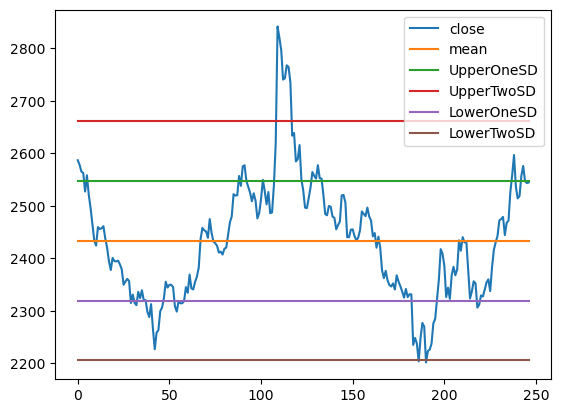

In [13]:
data.plot();

In [18]:
# plotly

fig = px.line(data, x = data.Date, y = data.columns[1:])
fig.add_trace
fig.show()

In [17]:
data

,Date,close,mean,UpperOneSD,UpperTwoSD,LowerOneSD,LowerTwoSD
0,27-Dec-2023,2586.85,2433.262753,2547.306398,2661.350043,2319.219108,2205.175463
1,26-Dec-2023,2578.05,2433.262753,2547.306398,2661.350043,2319.219108,2205.175463
2,22-Dec-2023,2565.05,2433.262753,2547.306398,2661.350043,2319.219108,2205.175463
3,21-Dec-2023,2562.55,2433.262753,2547.306398,2661.350043,2319.219108,2205.175463
4,20-Dec-2023,2527.15,2433.262753,2547.306398,2661.350043,2319.219108,2205.175463
...,...,...,...,...,...,...,...
242,03-Jan-2023,2557.05,2433.262753,2547.306398,2661.350043,2319.219108,2205.175463
243,02-Jan-2023,2575.90,2433.262753,2547.306398,2661.350043,2319.219108,2205.175463
244,30-Dec-2022,2547.20,2433.262753,2547.306398,2661.350043,2319.219108,2205.175463
245,29-Dec-2022,2543.30,2433.262753,2547.306398,2661.350043,2319.219108,2205.175463
